<a href="https://colab.research.google.com/github/Gin-Arata/PCVK_13_Gaco-Razan-Kamil/blob/main/Week12_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# @title Mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
# @title Import lIbrary

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

# Detect Face Menggunakan Haarcascade

## Detect face manusia

In [3]:
# @title Function detect face

def detect_faces(image_path):
  haar_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

  image = cv.imread(image_path)
  image_face = image.copy()
  gray = cv.cvtColor(image_face, cv.COLOR_BGR2GRAY)
  faces = haar_cascade.detectMultiScale(gray)

  # Buat kotak di area wajah
  for (x, y, w, h) in faces:
    cv.rectangle(image_face, (x, y), (x + w, y + h), (0, 255, 0), 2)

  # Melakukan konversi image ke rgb
  image_face = cv.cvtColor(image_face, cv.COLOR_BGR2RGB)
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

  return image, image_face

In [4]:
# @title Melakukan deteksi wajah

jokowi, jokowi_face = detect_faces('/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg')

kartini, kartini_face = detect_faces('/content/drive/MyDrive/PCVK/Images/facedet/kartini.jpg')

kucing, kucing_face = detect_faces('/content/drive/MyDrive/PCVK/Images/facedet/kucing.jpg')

mask, mask_face = detect_faces('/content/drive/MyDrive/PCVK/Images/facedet/mask.png')

mjordan, mjordan_face = detect_faces('/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg')

solvayconf, solvayconf_face = detect_faces('/content/drive/MyDrive/PCVK/Images/facedet/solvayconf.jpg')

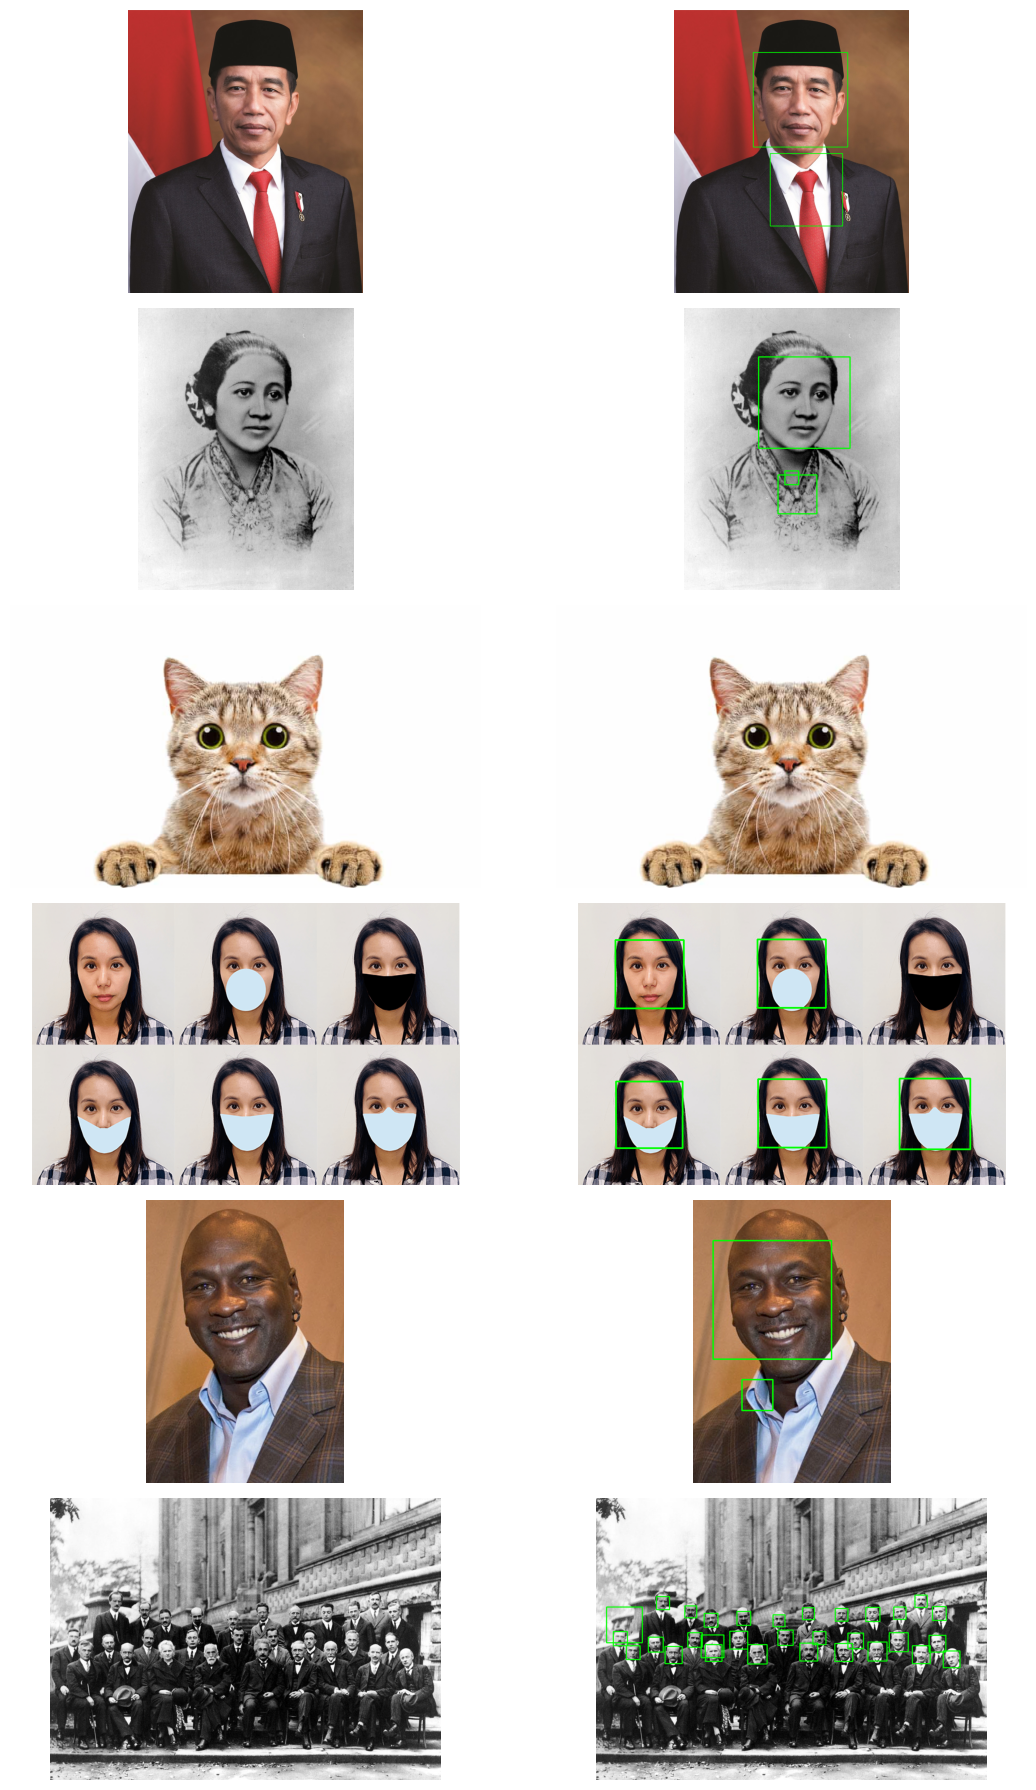

In [5]:
# @title Menampilkan hasil deteksi wajah

fig, axes = plt.subplots(6, 2, figsize=(12, 18))

axes[0, 0].imshow(jokowi)
axes[0, 0].axis('off')
axes[0, 1].imshow(jokowi_face)
axes[0, 1].axis('off')

axes[1, 0].imshow(kartini)
axes[1, 0].axis('off')
axes[1, 1].imshow(kartini_face)
axes[1, 1].axis('off')

axes[2, 0].imshow(kucing)
axes[2, 0].axis('off')
axes[2, 1].imshow(kucing_face)
axes[2, 1].axis('off')

axes[3, 0].imshow(mask)
axes[3, 0].axis('off')
axes[3, 1].imshow(mask_face)
axes[3, 1].axis('off')

axes[4, 0].imshow(mjordan)
axes[4, 0].axis('off')
axes[4, 1].imshow(mjordan_face)
axes[4, 1].axis('off')

axes[5, 0].imshow(solvayconf)
axes[5, 0].axis('off')
axes[5, 1].imshow(solvayconf_face)
axes[5, 1].axis('off')

plt.tight_layout()
plt.show()

## Detect face kucing

In [7]:
# @title Function detect face cat

def detect_face_cat(image_path):
  cat_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalcatface.xml')

  # Membaca gambar
  image = cv.imread(image_path)
  image_face = image.copy()
  gray = cv.cvtColor(image_face, cv.COLOR_BGR2GRAY)

  # Deteksi wajah manusia atau kucing
  faces = cat_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(80, 80))

  # Membuat kotak di sekitar wajah
  for (x, y, w, h) in faces:
      cv.rectangle(image_face, (x, y), (x + w, y + h), (0, 255, 0), 2)

  # Melakukan konversi channel warna ke rgb
  image_face = cv.cvtColor(image_face, cv.COLOR_BGR2RGB)
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

  return image, image_face

In [8]:
# @title Melakukan detect wajah kucing

kartini, kartini_face = detect_face_cat('/content/drive/MyDrive/PCVK/Images/facedet/kartini.jpg')

kucing, kucing_face = detect_face_cat('/content/drive/MyDrive/PCVK/Images/facedet/kucing.jpg')

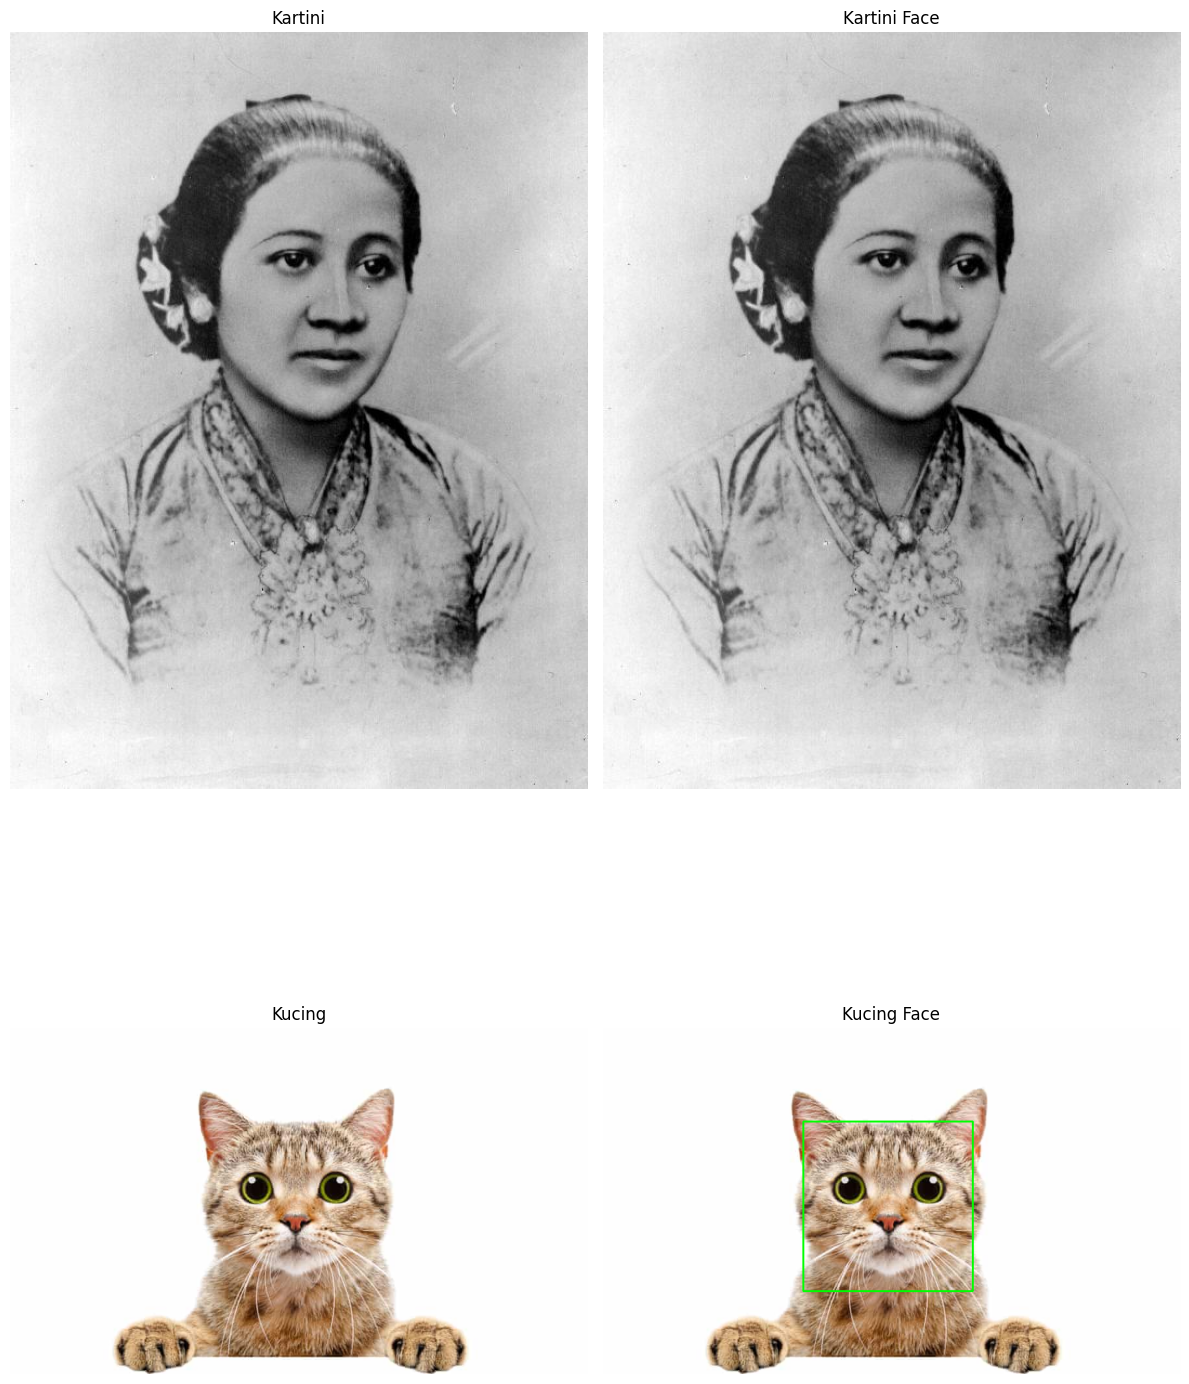

In [11]:
# @title Menampilkan hasil gambar face detection

fig, axes = plt.subplots(2, 2, figsize=(12, 18))

axes[0, 0].imshow(kartini)
axes[0, 0].axis('off')
axes[0, 0].set_title('Kartini')
axes[0, 1].imshow(kartini_face)
axes[0, 1].axis('off')
axes[0, 1].set_title('Kartini Face')

axes[1, 0].imshow(kucing)
axes[1, 0].axis('off')
axes[1, 0].set_title('Kucing')
axes[1, 1].imshow(kucing_face)
axes[1, 1].axis('off')
axes[1, 1].set_title('Kucing Face')

plt.tight_layout()
plt.show()

## Detect eyes

In [14]:
# @title Function untuk detect eye

def detect_eyes(image_path):
  haar_cascade_eye = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

  image = cv.imread(image_path)
  image_result = image.copy()
  gray = cv.cvtColor(image_result, cv.COLOR_BGR2GRAY)

  # Deteksi mata di seluruh gambar
  eyes = haar_cascade_eye.detectMultiScale(gray)

  # Gambar kotak di sekitar mata
  for (x, y, w, h) in eyes:
      cv.rectangle(image_result, (x, y), (x + w, y + h), (0, 255, 0), 2)

  # Melakukan konversi warna channel ke rgb
  image_result = cv.cvtColor(image_result, cv.COLOR_BGR2RGB)
  original_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

  return original_image, image_result

(-0.5, 872.5, 1049.5, -0.5)

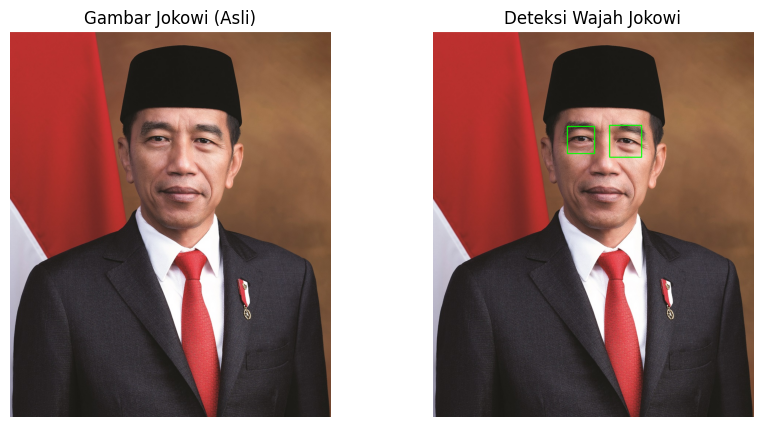

In [18]:
# @title Melakukan dan menampilkan hasil deteksi mata pada gambar jokowi

jokowi, jokowi_eyes = detect_eyes('/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg')

# Membuat figure dengan 1 baris, 2 kolom
plt.figure(figsize=(10, 5))

# Kolom pertama: Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(jokowi)
plt.title("Gambar Jokowi (Asli)")
plt.axis("off")

# Kolom kedua: Gambar dengan deteksi wajah
plt.subplot(1, 2, 2)
plt.imshow(jokowi_eyes)
plt.title("Deteksi Wajah Jokowi")
plt.axis("off")

## Melakukan face tracking

In [20]:
# @title Function convert js object ke opencv

def js_to_image(js_reply):
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

In [21]:
# @title Function untuk convert opencv rectangle ke base64 string yang nanti digunakan untuk video

def bbox_to_bytes(bbox_array):
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [22]:
# @title Inisialisasi haar cascade frontal face

face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [23]:
# @title Function untuk mengambil gambar dari js

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            video.style.transform = 'scaleX(-1)'; // Membalik tampilan horizontal
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Tunggu hingga Capture diklik
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            const ctx = canvas.getContext('2d');

            // Membalikkan hasil gambar agar tidak mirror
            ctx.translate(canvas.width, 0);
            ctx.scale(-1, 1);
            ctx.drawImage(video, 0, 0);

            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


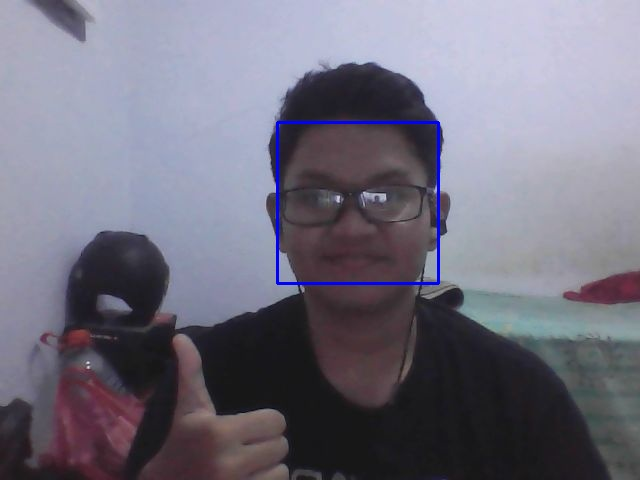

In [26]:
# @title Melakukan pendeteksian wajah dari pengambil foto

try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [27]:
# @title function js untuk record video dari browser

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.style.transform = 'scaleX(-1)'; // Membalik tampilan video agar tidak mirror
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}}); // Ganti dengan "user" untuk kamera depan
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [28]:
# @title Melakukan streaming video sekaligus deteksi wajah

video_stream()

# Label for video
label_html = 'Capturing...'
# Initialize bounding box to empty
bbox = ''
count = 0

while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # Convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # Create transparent overlay for bounding box
    bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)

    # Grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Get face region coordinates
    faces = face_cascade.detectMultiScale(gray)

    # Flip the coordinates for mirrored video
    for (x, y, w, h) in faces:
        # Adjust the x-coordinate for mirrored image
        flipped_x = img.shape[1] - (x + w)
        bbox_array = cv2.rectangle(bbox_array, (flipped_x, y), (flipped_x + w, y + h), (255, 0, 0), 2)

    bbox_array[:, :, 3] = (bbox_array.max(axis=2) > 0).astype(int) * 255
    # Convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # Update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

## Melakukan blurring pada wajah saja

In [33]:
# @title Function untuk detect face dan melakukan blurring

def detect_faces_with_blur(image_path):
  haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

  # Baca gambar
  image = cv2.imread(image_path)
  image_face = image.copy()
  gray = cv2.cvtColor(image_face, cv2.COLOR_BGR2GRAY)

  # Deteksi wajah
  faces = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

  # Blur bagian wajah yang terdeteksi
  for (x, y, w, h) in faces:
      # Ekstrak ROI (Region of Interest)
      face_roi = image_face[y:y+h, x:x+w]

      # Terapkan Median Blur
      blurred_face = cv2.medianBlur(face_roi, 35)

      # Ganti area wajah asli dengan versi blur
      image_face[y:y+h, x:x+w] = blurred_face

  # Konversi ke RGB untuk matplotlib
  image_face = cv2.cvtColor(image_face, cv2.COLOR_BGR2RGB)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  return image, image_face

In [34]:
# @title Melakukan deteksi wajah

mjordan, mjordan_blurred = detect_faces_with_blur('/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg')

(-0.5, 397.5, 567.5, -0.5)

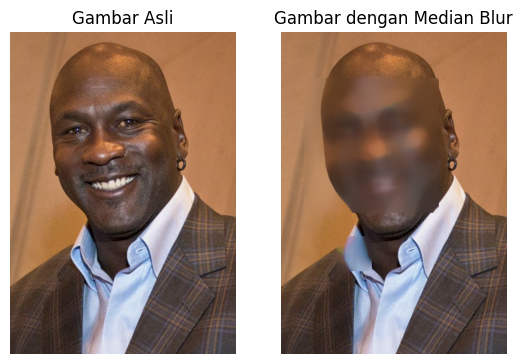

In [35]:
# @title Menampilkan gambar setelah dan sebelum dilakukan blurring

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(mjordan)
plt.title("Gambar Asli")
plt.axis("off")

# Gambar dengan wajah blur
plt.subplot(1, 2, 2)
plt.imshow(mjordan_blurred)
plt.title("Gambar dengan Median Blur")
plt.axis("off")

## Melakukan segmentasi KTP

In [38]:
# @title Melakukan pambacaan image dan pre process ktp

ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP_More/KTP_More/ktp3.png')

# Filtering
blurred = cv.GaussianBlur(ktp, (5, 5), 0)

# Mengubah ke grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Melakukan thresholding
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

In [39]:
# @title Melakukan proses morfologi pada ktp

kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))

# Operasi pembukaan (opening) untuk memperjelas batas antar objek
closed_img = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

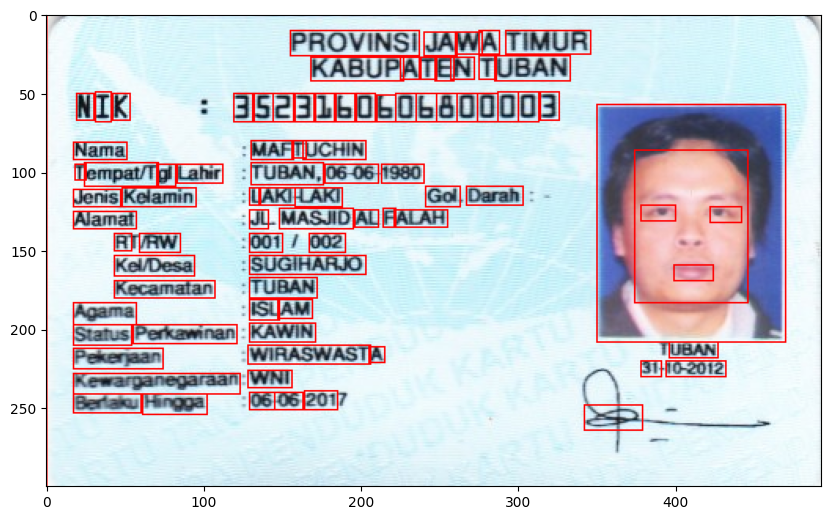

In [40]:
# @title Melakukan pendeteksian setiap karakter pada ktp

img = closed_img.copy()
img_draw = ktp.copy()

contours, hierarchy = cv.findContours(img.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
        cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 7 and float(ras) <= 8:
        cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(img_draw, cv.COLOR_BGR2RGB)),
plt.axis('on')
plt.show()

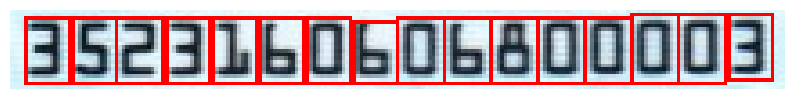

In [41]:
# @title Melakuka cropping untuk NIK saja

cropped_img = img_draw[48:70, 115:330]

plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB)),
plt.axis('off')
plt.show()

In [44]:
import os
import tqdm
import cv2
import random
import numpy as np
import pickle

# Direktori data training
DATADIR = "dataset/training"
dirs = []

training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
    dirs.append(char_name)

# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
    path = os.path.join(DATADIR, char_name)
    class_number = dirs.index(char_name)
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(data_dir_testing, car,char_image), cv2.IMREAD_ANYCOLOR)
            new_array = cv2.resize(img_array, (width, height))
            training_data.append([new_array, class_number])
        except Exception as e:
            pass

random.shuffle(training_data)
X = []
Y = []

for feature, label in training_data:
    X.append(feature)
    Y.append(label)

X = np.array(X).reshape(-1, width, height, 1)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/training'

In [45]:
import pickle
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense,
ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

# Load file pickle
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)

Y = to_categorical(Y)
X = X / 255.0
width, height = 100, 100

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)

flaten = Flatten()(conv_layer)

fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(34, activation='softmax')(fc_layer)

adam = Adam(lr=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(X, Y, epochs=20, verbose=1)

model.save('anpr.model')

SyntaxError: trailing comma not allowed without surrounding parentheses (<ipython-input-45-572b9f04b3a2>, line 2)

In [46]:
import os
import cv2
import tensorflow as tf
import numpy as np

data_dir_training = "dataset/training-bak"
data_dir_testing = "dataset/testing"
dirs = []
width, height = 100, 100

model = tf.keras.models.load_model("anpr.model")

for char_name in sorted(os.listdir(data_dir_training)):
    dirs.append(char_name)

for car in sorted(os.listdir(data_dir_testing)):
    temp = ""
    for char_img in sorted(os.listdir(os.path.join(data_dir_testing,
car))):
        img_array = cv2.imread(os.path.join(data_dir_testing, car,
char_img), cv2.IMREAD_ANYCOLOR)
        new_array = cv2.resize(img_array, (width, height))
        new_array = np.array(new_array).reshape(-1, width, height,
1)

        new_array = new_array / 255.0

        prediction = model.predict(new_array)
        temp += dirs[np.argmax(prediction[0])]

    print("folder name: {} no: {}".format(car, temp))

ValueError: File format not supported: filepath=anpr.model. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(anpr.model, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

# Tugas

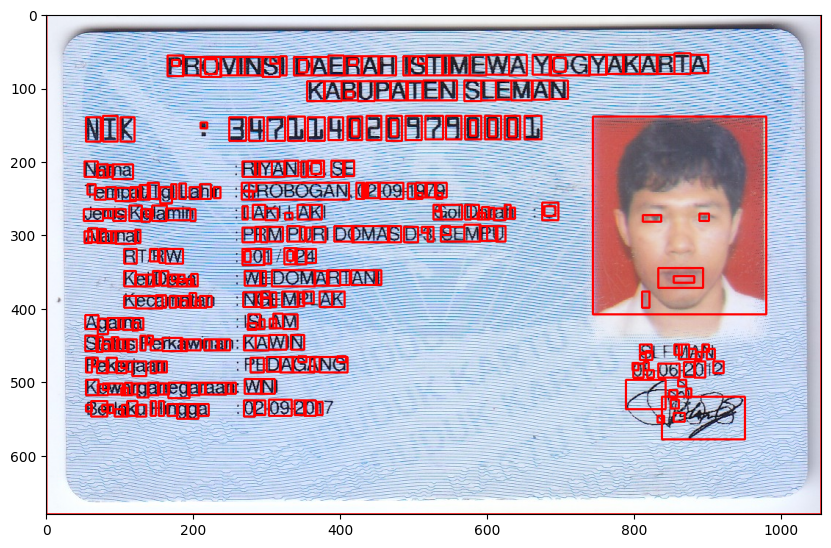

In [42]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP_More/KTP_More/ktp.png')

# Filtering
blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

# Mengubah ke grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Melakukan thresholding
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))

# Operasi pembukaan (opening) untuk memperjelas batas antar objek
closed_img = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

img = closed_img.copy()
img_draw = ktp.copy()

contours, hierarchy = cv.findContours(img.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
        cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 7 and float(ras) <= 8:
        cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(img_draw, cv.COLOR_BGR2RGB)),
plt.axis('on')
plt.show()

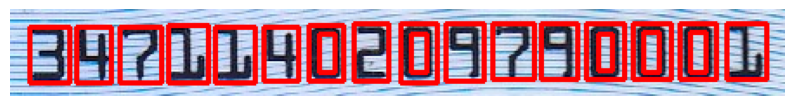

In [43]:
# @title Melakukan cropping untuk nik saja

cropped_img = img_draw[130:180, 238:685]

plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB)),
plt.axis('off')
plt.show()